# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import Datasets

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1CfuTidDZxaIkMt_Sl3l0vUUrbxKtS227")
df_processed = df.copy()

# Soal 1:
Lakukan analisis eksplorasi data pada dataset tersebut dan berikan penjelasannya dan visualisasinya menggunakan python

## 1.1 Jalankan fungsi-fungsi dasar: info(), describe() dan sebagainya

In [ ]:
#show top 5 data
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
df['sex'].unique()

array([0, 1])

In [ ]:
display(df['AqChannel'].unique())

array([4, 3, 1, 2])

In [ ]:
display(df['region'].unique())

array([1, 2, 3])

In [ ]:
display(df['Marital_status'].unique())

array([1, 2])

In [ ]:
display(df['segment'].unique())

array([1, 3, 2])


1.   Dari tabel di atas terlihat ada 10 kolom dengan tipe data numerik



---


2.   Namun jika dilihat pada data dictionary yang ada di soal, terdapat data yang seharusnya bertipe kategorikal seperti:
* Sex (0: Laki-laki, 1: Perempuan)
* AqChannel (1, 2, 3, 4)
* region (1, 2, 3)
* Marital_Status (1: Single, 2:Menikah)
* segment (1, 2, 3)

---



3. Pada tabel info di atas dapat dilihat juga bahwa tidak ditemukan ada data yang kosong. Terlihat dari jumlah baris setiap kolom sejumlah 200

In [ ]:
#filter only for "customer usage" data. Check the numerical data statistic
df_filtered = df.drop(columns=["custid", "sex", "AqChannel", "region", "Marital_status", "segment"])
display(df_filtered.describe())

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.000000,200.000000,200.000000
mean,52.230000,52.775000,63.174000,58.052500
std,10.252937,9.478586,11.242137,10.426445
min,28.000000,31.000000,39.600000,34.100000
25%,44.000000,45.750000,54.000000,50.325000
50%,50.000000,54.000000,62.400000,59.400000
75%,60.000000,60.000000,70.800000,66.000000
max,76.000000,67.000000,90.000000,73.700000


In [ ]:
#filter only for categorical data. Check the categorical data statistic

#convert numeric type for column "sex" into categorical
df_processed.loc[df_processed["sex"] == 0, "sex"] = "Laki-laki"
df_processed.loc[df_processed["sex"] == 1, "sex"] = "Perempuan"

#convert numeric type into string
df_processed.loc[df_processed["AqChannel"] == 1, "AqChannel"] = "Acquisition Channel 1"
df_processed.loc[df_processed["AqChannel"] == 2, "AqChannel"] = "Acquisition Channel 2"
df_processed.loc[df_processed["AqChannel"] == 3, "AqChannel"] = "Acquisition Channel 3"
df_processed.loc[df_processed["AqChannel"] == 4, "AqChannel"] = "Acquisition Channel 4"

#convert numeric type into string
df_processed.loc[df_processed["region"] == 1, "region"] = "Region 1"
df_processed.loc[df_processed["region"] == 2, "region"] = "Region 2"
df_processed.loc[df_processed["region"] == 3, "region"] = "Region 3"

#convert numeric type for column "marital_status" into categorical
df_processed.loc[df_processed["Marital_status"] == 1, "Marital_status"] = "Single"
df_processed.loc[df_processed["Marital_status"] == 2, "Marital_status"] = "Menikah"

#convert numeric type into string
df_processed.loc[df_processed["segment"] == 1, "segment"] = "Segment 1"
df_processed.loc[df_processed["segment"] == 2, "segment"] = "Segment 2"
df_processed.loc[df_processed["segment"] == 3, "segment"] = "Segment 3"

# categorical descriptive
df_processed.describe(include=object)

/tmp/ipython-input-1125243520.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Laki-laki' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed["sex"] == 0, "sex"] = "Laki-laki"
/tmp/ipython-input-1125243520.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Acquisition Channel 1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed["AqChannel"] == 1, "AqChannel"] = "Acquisition Channel 1"
/tmp/ipython-input-1125243520.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Region 1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed["region"] =

,sex,AqChannel,region,Marital_status,segment
count,200,200,200,200,200
unique,2,4,3,2,3
top,Perempuan,Acquisition Channel 4,Region 2,Single,Segment 2
freq,109,145,95,168,105


#Show processed data with more descriptive details

In [ ]:
df_processed.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,Laki-laki,Acquisition Channel 4,Region 1,Single,Segment 1,57,52,49.2,57.2
1,121,Perempuan,Acquisition Channel 4,Region 2,Single,Segment 3,68,59,63.6,64.9
2,86,Laki-laki,Acquisition Channel 4,Region 3,Single,Segment 1,44,33,64.8,36.3
3,141,Laki-laki,Acquisition Channel 4,Region 3,Single,Segment 3,63,44,56.4,48.4
4,172,Laki-laki,Acquisition Channel 4,Region 2,Single,Segment 2,47,52,68.4,57.2


In [ ]:
df_processed.tail()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
195,31,Perempuan,Acquisition Channel 2,Region 2,Menikah,Segment 1,55,59,62.4,64.9
196,145,Perempuan,Acquisition Channel 4,Region 2,Single,Segment 3,42,46,45.6,50.6
197,187,Perempuan,Acquisition Channel 4,Region 2,Menikah,Segment 1,57,41,68.4,45.1
198,118,Perempuan,Acquisition Channel 4,Region 2,Single,Segment 1,55,62,69.6,68.2
199,137,Perempuan,Acquisition Channel 4,Region 3,Single,Segment 2,63,65,78.0,71.5


## 1.2 Buat histogram untuk melihat persebaran data pada beberapa variabel yang menurut Anda penting

#Show high level "customer usage" data:
pre_usage, post_usage_1month, post_usage_2ndmonth, latest_mon_usage

In [ ]:
df_processed[["pre_usage", "Post_usage_1month", "post_usage_2ndmonth", "Latest_mon_usage"]].describe()

,pre_usage,Post_usage_1month,post_usage_2ndmonth,Latest_mon_usage
count,200.000000,200.000000,200.000000,200.000000
mean,52.230000,52.775000,58.052500,63.174000
std,10.252937,9.478586,10.426445,11.242137
min,28.000000,31.000000,34.100000,39.600000
25%,44.000000,45.750000,50.325000,54.000000
50%,50.000000,54.000000,59.400000,62.400000
75%,60.000000,60.000000,66.000000,70.800000
max,76.000000,67.000000,73.700000,90.000000


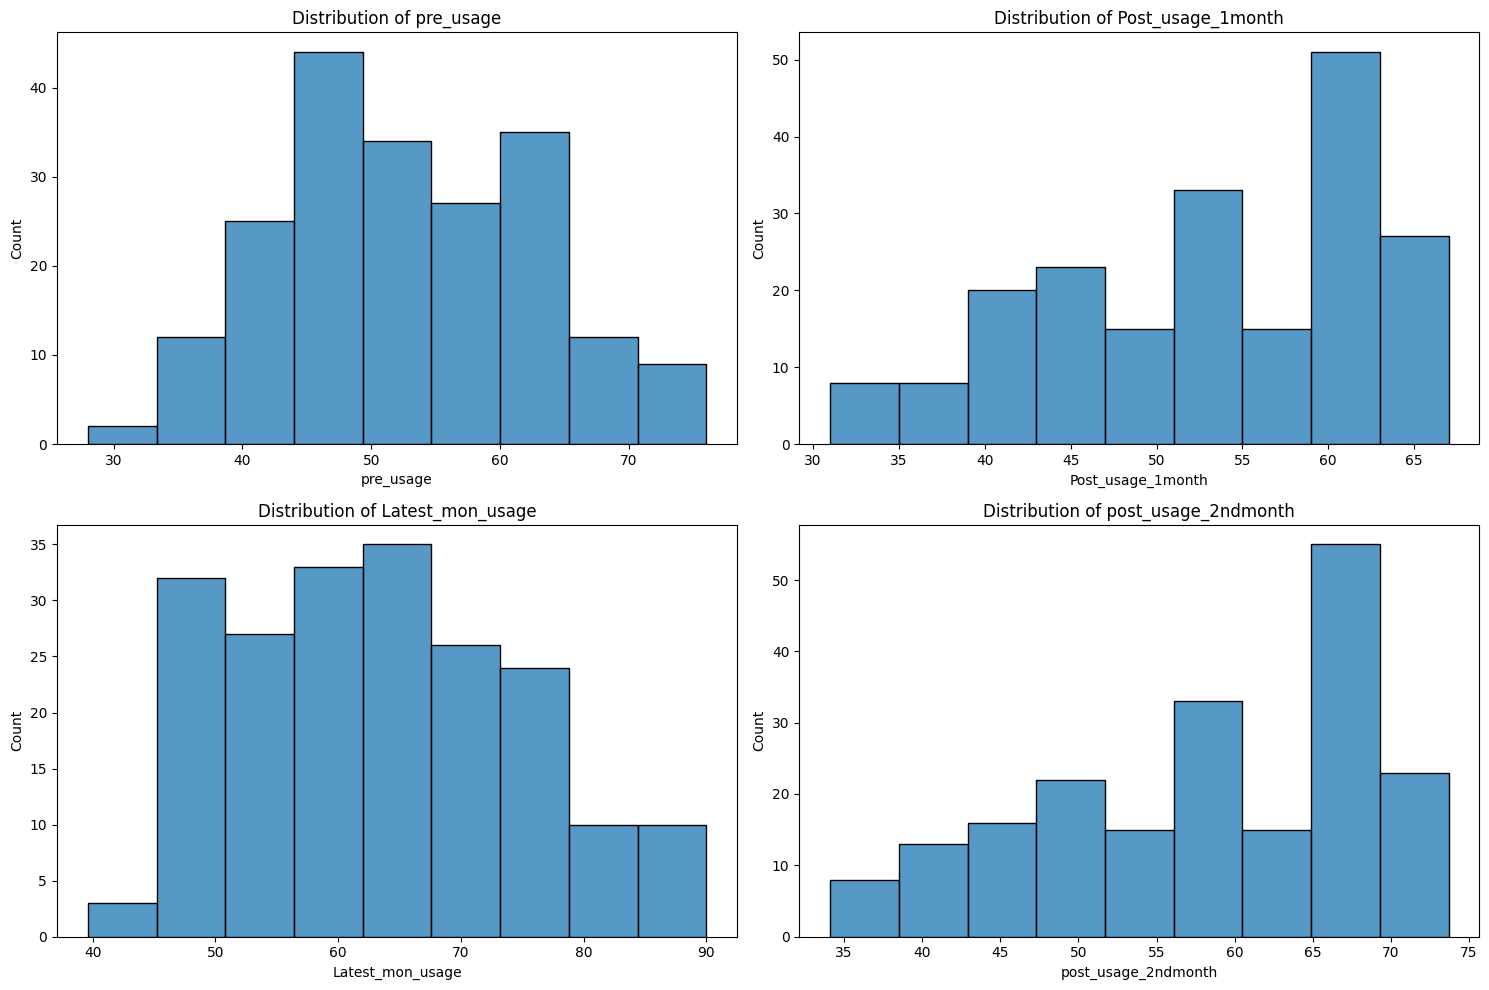

In [ ]:
# Create histograms for the usage columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df_processed, x="pre_usage")
plt.title("Distribution of pre_usage")

plt.subplot(2, 2, 2)
sns.histplot(data=df_processed, x="Post_usage_1month")
plt.title("Distribution of Post_usage_1month")

plt.subplot(2, 2, 3)
sns.histplot(data=df_processed, x="Latest_mon_usage")
plt.title("Distribution of Latest_mon_usage")

plt.subplot(2, 2, 4)
sns.histplot(data=df_processed, x="post_usage_2ndmonth")
plt.title("Distribution of post_usage_2ndmonth")

plt.tight_layout()
plt.show()

## Group by Segment, Sex, Marital Status

In [ ]:
grouped_by_segment = df_processed.groupby("segment")

mean_usage_per_segment = grouped_by_segment[["pre_usage", "Post_usage_1month", "Latest_mon_usage", "post_usage_2ndmonth"]].mean()
display(mean_usage_per_segment)

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
segment,,,,
Segment 1,49.755556,51.333333,60.026667,56.466667
Segment 2,56.161905,56.257143,68.080000,61.882857
Segment 3,46.200000,46.760000,55.704000,51.436000


In [ ]:
grouped_by_sex = df_processed.groupby("sex")

mean_usage_per_sex = grouped_by_sex[["pre_usage", "Post_usage_1month", "Latest_mon_usage", "post_usage_2ndmonth"]].mean()
display(mean_usage_per_sex)

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
sex,,,,
Laki-laki,52.824176,50.120879,63.534066,55.132967
Perempuan,51.733945,54.990826,62.873394,60.489908


In [ ]:
grouped_by_marital = df_processed.groupby("Marital_status")

mean_usage_per_marital = grouped_by_marital[["pre_usage", "Post_usage_1month", "Latest_mon_usage", "post_usage_2ndmonth"]].mean()
display(mean_usage_per_marital)

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
Marital_status,,,,
Menikah,54.250000,55.53125,65.700000,61.084375
Single,51.845238,52.25000,62.692857,57.475000


In [ ]:
grouped_by_region = df_processed.groupby("region")

mean_usage_per_region = grouped_by_region[["pre_usage", "Post_usage_1month", "Latest_mon_usage", "post_usage_2ndmonth"]].mean()
display(mean_usage_per_region)

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
region,,,,
Region 1,48.276596,50.617021,59.004255,55.678723
Region 2,51.578947,51.926316,62.652632,57.118947
Region 3,56.500000,55.913793,67.406897,61.505172


In [ ]:
grouped_by_channel = df_processed.groupby("AqChannel")

mean_usage_per_channel = grouped_by_channel[["pre_usage", "Post_usage_1month", "Latest_mon_usage", "post_usage_2ndmonth"]].mean()
display(mean_usage_per_channel)

,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
AqChannel,,,,
Acquisition Channel 1,46.666667,46.458333,56.900000,51.104167
Acquisition Channel 2,51.909091,58.000000,68.727273,63.800000
Acquisition Channel 3,46.800000,48.200000,56.100000,53.020000
Acquisition Channel 4,53.924138,54.055172,64.766897,59.460690


## Visualization group by Segment, Sex, Marital Status

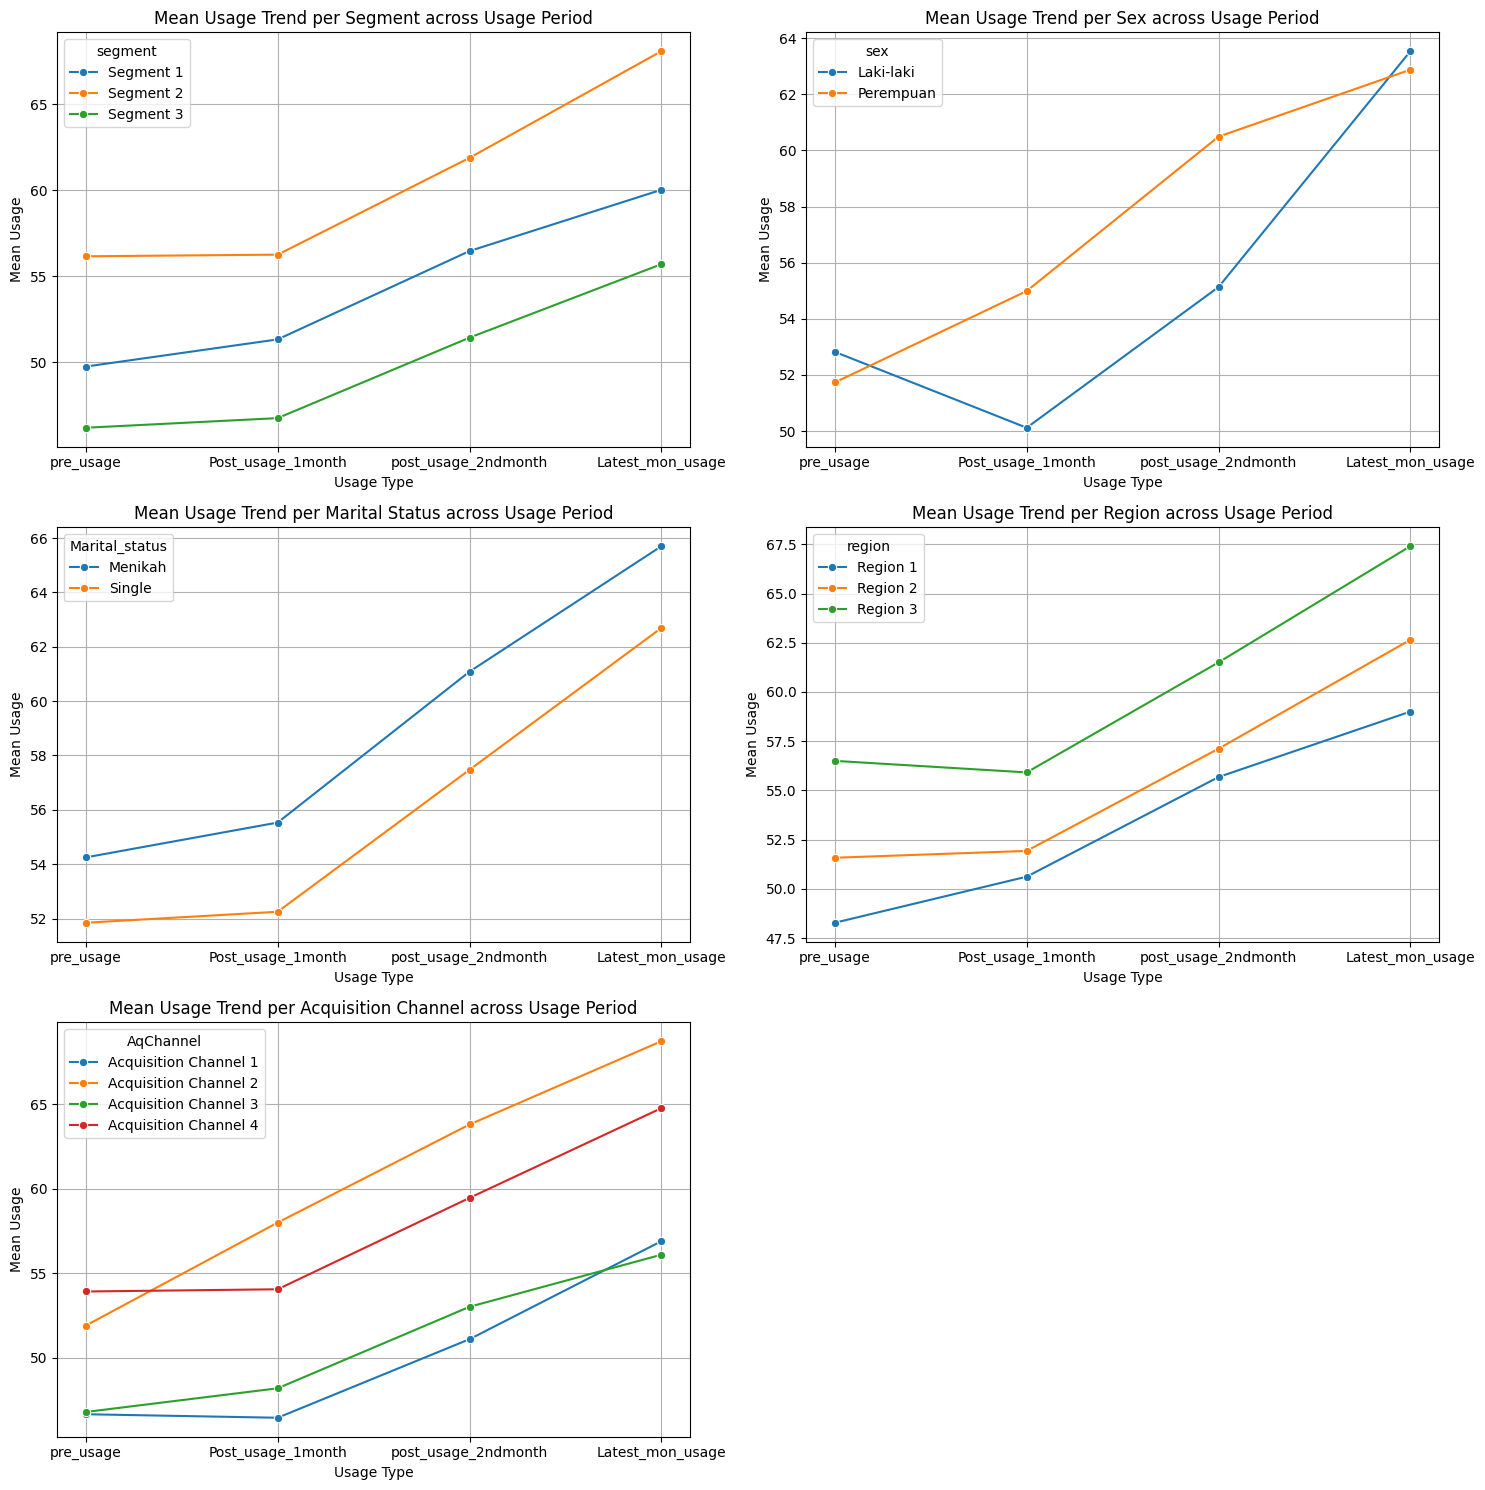

In [ ]:
# Regenerate melted data for Segment
mean_usage_per_segment_reset = mean_usage_per_segment.reset_index()
mean_usage_melted_segment = mean_usage_per_segment_reset.melt(id_vars='segment', var_name='Usage_Type', value_name='Mean_Usage')
usage_order = ['pre_usage', 'Post_usage_1month', 'post_usage_2ndmonth', 'Latest_mon_usage']
mean_usage_melted_segment['Usage_Type'] = pd.Categorical(mean_usage_melted_segment['Usage_Type'], categories=usage_order, ordered=True)
mean_usage_melted_segment = mean_usage_melted_segment.sort_values('Usage_Type')

# Regenerate melted data for Sex
mean_usage_per_sex_reset = mean_usage_per_sex.reset_index()
mean_usage_melted_sex = mean_usage_per_sex_reset.melt(id_vars='sex', var_name='Usage_Type', value_name='Mean_Usage')
mean_usage_melted_sex['Usage_Type'] = pd.Categorical(mean_usage_melted_sex['Usage_Type'], categories=usage_order, ordered=True)
mean_usage_melted_sex = mean_usage_melted_sex.sort_values('Usage_Type')

# Regenerate melted data for Marital Status
mean_usage_per_marital_reset = mean_usage_per_marital.reset_index()
mean_usage_melted_marital = mean_usage_per_marital_reset.melt(id_vars='Marital_status', var_name='Usage_Type', value_name='Mean_Usage')
mean_usage_melted_marital['Usage_Type'] = pd.Categorical(mean_usage_melted_marital['Usage_Type'], categories=usage_order, ordered=True)
mean_usage_melted_marital = mean_usage_melted_marital.sort_values('Usage_Type')

# Regenerate melted data for region
mean_usage_per_region_reset = mean_usage_per_region.reset_index()
mean_usage_melted_region = mean_usage_per_region_reset.melt(id_vars='region', var_name='Usage_Type', value_name='Mean_Usage')
mean_usage_melted_region['Usage_Type'] = pd.Categorical(mean_usage_melted_region['Usage_Type'], categories=usage_order, ordered=True)
mean_usage_melted_region = mean_usage_melted_region.sort_values('Usage_Type')

# Regenerate melted data for Acquisition Channel
mean_usage_per_channel_reset = mean_usage_per_channel.reset_index()
mean_usage_melted_channel = mean_usage_per_channel_reset.melt(id_vars='AqChannel', var_name='Usage_Type', value_name='Mean_Usage')
mean_usage_melted_channel['Usage_Type'] = pd.Categorical(mean_usage_melted_channel['Usage_Type'], categories=usage_order, ordered=True)
mean_usage_melted_channel = mean_usage_melted_channel.sort_values('Usage_Type')


plt.figure(figsize=(15, 15)) # Increased figure size to accommodate more plots

# Plot for Segment
plt.subplot(3, 2, 1) # Changed to 3 rows, 2 columns, 1st position
sns.lineplot(data=mean_usage_melted_segment, x='Usage_Type', y='Mean_Usage', hue='segment', marker='o')
plt.title('Mean Usage Trend per Segment across Usage Period')
plt.ylabel('Mean Usage')
plt.xlabel('Usage Type')
plt.grid(True)

# Plot for Sex
plt.subplot(3, 2, 2) # Changed to 3 rows, 2 columns, 2nd position
sns.lineplot(data=mean_usage_melted_sex, x='Usage_Type', y='Mean_Usage', hue='sex', marker='o')
plt.title('Mean Usage Trend per Sex across Usage Period')
plt.ylabel('Mean Usage')
plt.xlabel('Usage Type')
plt.grid(True)

# Plot for Marital Status
plt.subplot(3, 2, 3) # Changed to 3 rows, 2 columns, 3rd position
sns.lineplot(data=mean_usage_melted_marital, x='Usage_Type', y='Mean_Usage', hue='Marital_status', marker='o')
plt.title('Mean Usage Trend per Marital Status across Usage Period')
plt.ylabel('Mean Usage')
plt.xlabel('Usage Type')
plt.grid(True)

# Plot for Region
plt.subplot(3, 2, 4) # Changed to 3 rows, 2 columns, 4th position
sns.lineplot(data=mean_usage_melted_region, x='Usage_Type', y='Mean_Usage', hue='region', marker='o')
plt.title('Mean Usage Trend per Region across Usage Period')
plt.ylabel('Mean Usage')
plt.xlabel('Usage Type')
plt.grid(True)

# Plot for Acquisition Channel
plt.subplot(3, 2, 5) # Changed to 3 rows, 2 columns, 5th position
sns.lineplot(data=mean_usage_melted_channel, x='Usage_Type', y='Mean_Usage', hue='AqChannel', marker='o')
plt.title('Mean Usage Trend per Acquisition Channel across Usage Period')
plt.ylabel('Mean Usage')
plt.xlabel('Usage Type')
plt.grid(True)


plt.tight_layout()
plt.show()

# Soal 2:
Lakukan uji hipotesis untuk melihat apakah kampanye yang dilakukan berhasil (gunakan fungsi ttest_rel)

## 2.1 Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 1 bulan setelah kampanye

# H0 (Hipotesis Nol):
Tidak ada peningkatan penggunaan kartu kredit secara signifikan 1 bulan setelah kampanye dibandingkan sebelum kampanye. (Penggunaan 1 bulan setelah kampanye ≤ Penggunaan sebelum kampanye)


---


# H1 (Hipotesis Alternatif):
Ada peningkatan penggunaan kartu kredit secara signifikan 1 bulan setelah kampanye dibandingkan sebelum kampanye. (Penggunaan 1 bulan setelah kampanye > Penggunaan sebelum kampanye)

In [ ]:
#Membuat fungsi untuk menganalisa hasil perbandingan nilai alpha & p_value

def cek_hasil_uji(p_value, alpha, condition):
  # Jika nilai p (p_value) lebih kecil dari alpha (tingkat signifikansi, biasanya 0.05):
  if p_value < alpha:
      # Ini berarti perbedaannya signifikan secara statistik. Kita menolak hipotesis nol.
      print("\nBerdasarkan nilai p (kurang dari 0.05), hipotesis nol DITOLAK. Ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit antara sebelum kampanye dan",condition)

      # Kemudian, kita melihat nilai statistik T (statistic):
      if statistic < 0:
          # Jika statistik T negatif, berarti rata-rata penggunaan setelah kampanye lebih tinggi.
          print("\nKarena statistik T NEGATIF, penggunaan ", condition, "secara signifikan lebih tinggi daripada sebelum kampanye.\nHal ini menunjukkan bahwa kampanye BERHASIL dalam MENINGKATKAN PENGGUNAAN KARTU KREDIT.")
      else:
          # Jika statistik T positif, berarti rata-rata penggunaan setelah kampanye lebih rendah.
          print("\nKarena statistik T POSITIF, penggunaan ", condition, "secara signifikan lebih rendah daripada sebelum kampanye,\nHal ini menunjukkan bahwa kampanye TIDAK BERHASIL dalam MENINGKATKAN PENGGUNAAN KARTU KREDIT.")

  # Jika nilai p (p_value) tidak lebih kecil dari alpha (yaitu, lebih besar atau sama):
  else:

      # Ini berarti perbedaannya TIDAK signifikan secara statistik. Kita gagal menolak hipotesis nol.
      print("\nBerdasarkan nilai p (lebih besar atau sama dengan 0.05), hipotesis nol DITOLAK.\n\nTidak ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit antara sebelum kampanye dan",condition, ",\nyang berarti bahwa kampanye TIDAK BERHASIL dalam MENINGKATKAN PENGGUNAAN KARTU KREDIT.")

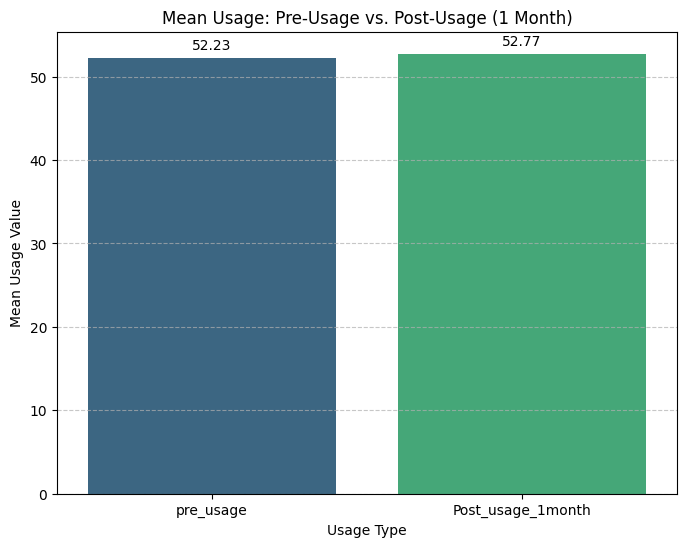

In [ ]:
mean_usage_data = df_processed[['pre_usage', 'Post_usage_1month']].mean().reset_index()
mean_usage_data.columns = ['Usage_Type', 'Mean_Usage']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Usage_Type', y='Mean_Usage', hue='Usage_Type', data=mean_usage_data, palette='viridis', legend=False)
plt.title('Mean Usage: Pre-Usage vs. Post-Usage (1 Month)')
plt.ylabel('Mean Usage Value')
plt.xlabel('Usage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [ ]:
# Melakukan t-test berpasangan antara 'pre_usage' dan 'Post_usage_1month'
statistic, p_value_two_tailed = stats.ttest_rel(df_processed['pre_usage'], df_processed['Post_usage_1month'])

print(f"T-statistic (two-tailed): {statistic:.2f}")
print(f"P-value (two-tailed): {p_value_two_tailed:.3f}")

# Menentukan p-value satu arah untuk hipotesis peningkatan penggunaan
# Hipotesis: penggunaan setelah kampanye (Post_usage_1month) lebih besar dari sebelum kampanye (pre_usage)

# Rata-rata 'pre_usage'
mean_pre_usage = df_processed['pre_usage'].mean()
# Rata-rata 'Post_usage_1month'
mean_post_usage_1month = df_processed['Post_usage_1month'].mean()

print(f"\nRata-rata pre_usage: {mean_pre_usage:.2f}")
print(f"Rata-rata Post_usage_1month: {mean_post_usage_1month:.2f}")

# Jika T-statistic negatif (yang berarti rata-rata Post_usage_1month > pre_usage),
# maka arah perbedaan mendukung hipotesis kita (peningkatan).
# Dalam kasus ini, p-value satu arah adalah p-value dua arah dibagi 2.
# Jika T-statistic positif, itu berarti rata-rata Post_usage_1month < pre_usage,
# yang berlawanan dengan hipotesis peningkatan, sehingga p-value satu arah akan sangat tinggi (1 - p_value_two_tailed/2) atau 1.

alpha = 0.05

if statistic < 0:
    # Karena statistik T negatif, ini menunjukkan Post_usage_1month > pre_usage
    # yang sesuai dengan hipotesis 'berhasil' (peningkatan penggunaan)
    p_value_one_tailed = p_value_two_tailed / 2
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    if p_value_one_tailed < alpha:
        print("\nInterpretasi (One-tailed): Kampanye BERHASIL secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.")
    else:
        print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.")
elif statistic > 0:
    # Ini berarti Post_usage_1month < pre_usage, berlawanan dengan hipotesis keberhasilan
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.")
else:
    # statistik = 0, tidak ada perbedaan
    p_value_one_tailed = 0.5
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.")

T-statistic (two-tailed): -0.87
P-value (two-tailed): 0.387

Rata-rata pre_usage: 52.23
Rata-rata Post_usage_1month: 52.77
P-value (one-tailed, for increase): 0.193

Interpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.


# Kesimpulan: Gagal Tolak H0
Karena kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 1 bulan setelah kampanye.

## 2.2 Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 2 bulan setelah kampanye

# H0 (Hipotesis Nol):
Tidak ada peningkatan penggunaan kartu kredit secara signifikan 2 bulan setelah kampanye dibandingkan sebelum kampanye. (Penggunaan 2 bulan setelah kampanye ≤ Penggunaan sebelum kampanye)


---


# H1 (Hipotesis Alternatif):
Ada peningkatan penggunaan kartu kredit secara signifikan 2 bulan setelah kampanye dibandingkan sebelum kampanye. (Penggunaan 2 bulan setelah kampanye > Penggunaan sebelum kampanye)

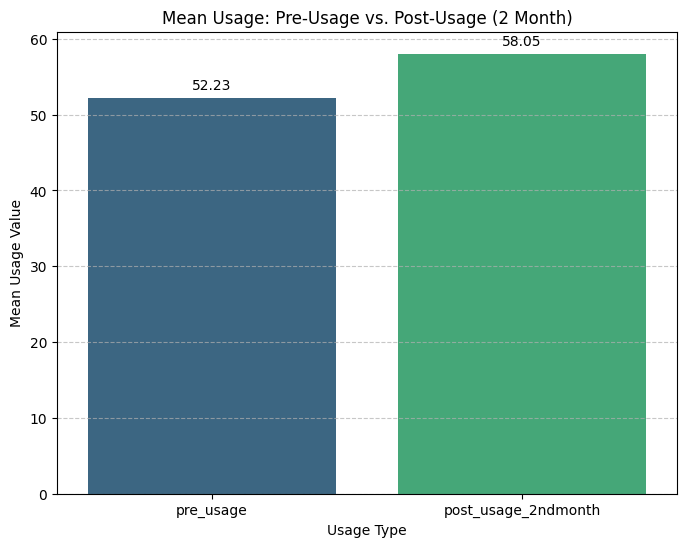

In [ ]:
mean_usage_data = df_processed[['pre_usage', 'post_usage_2ndmonth']].mean().reset_index()
mean_usage_data.columns = ['Usage_Type', 'Mean_Usage']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Usage_Type', y='Mean_Usage', hue='Usage_Type', data=mean_usage_data, palette='viridis', legend=False)
plt.title('Mean Usage: Pre-Usage vs. Post-Usage (2 Month)')
plt.ylabel('Mean Usage Value')
plt.xlabel('Usage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [ ]:
# Melakukan t-test berpasangan antara 'pre_usage' dan 'post_usage_2ndmonth'
statistic, p_value_two_tailed = stats.ttest_rel(df_processed['pre_usage'], df_processed['post_usage_2ndmonth'])

print(f"T-statistic (two-tailed): {statistic:.2f}")
print(f"P-value (two-tailed): {p_value_two_tailed:.3f}")

# Menentukan p-value satu arah untuk hipotesis peningkatan penggunaan
# Hipotesis: penggunaan setelah kampanye (post_usage_2ndmonth) lebih besar dari sebelum kampanye (pre_usage)

# Rata-rata 'pre_usage'
mean_pre_usage = df_processed['pre_usage'].mean()
# Rata-rata 'post_usage_2ndmonth'
mean_post_usage_2nd_month = df_processed['post_usage_2ndmonth'].mean()

print(f"\nRata-rata pre_usage: {mean_pre_usage:.2f}")
print(f"Rata-rata post_usage_2ndmonth: {mean_post_usage_2nd_month:.2f}")

# Jika T-statistic negatif (yang berarti rata-rata post_usage_2ndmonth > pre_usage),
# maka arah perbedaan mendukung hipotesis kita (peningkatan).
# Dalam kasus ini, p-value satu arah adalah p-value dua arah dibagi 2.
# Jika T-statistic positif, itu berarti rata-rata post_usage_2ndmonth < pre_usage,
# yang berlawanan dengan hipotesis peningkatan, sehingga p-value satu arah akan sangat tinggi (1 - p_value_two_tailed/2) atau 1.

if statistic < 0:
    # Karena statistik T negatif, ini menunjukkan post_usage_2ndmonth > pre_usage
    # yang sesuai dengan hipotesis 'berhasil' (peningkatan penggunaan)
    p_value_one_tailed = p_value_two_tailed / 2
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    if p_value_one_tailed < 0.05:
        print("\nInterpretasi (One-tailed): Kampanye BERHASIL secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.")
    else:
        print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.")
elif statistic > 0:
    # Ini berarti post_usage_2ndmonth < pre_usage, berlawanan dengan hipotesis keberhasilan
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.")
else:
    # statistik = 0, tidak ada perbedaan
    p_value_one_tailed = 0.5
    print(f"P-value (one-tailed, for increase): {p_value_one_tailed:.3f}")
    print("\nInterpretasi (One-tailed): Kampanye TIDAK berhasil secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.")

T-statistic (two-tailed): -8.87
P-value (two-tailed): 0.000

Rata-rata pre_usage: 52.23
Rata-rata post_usage_2ndmonth: 58.05
P-value (one-tailed, for increase): 0.000

Interpretasi (One-tailed): Kampanye BERHASIL secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.


# Kesimpulan: Tolak H0
Karena kampanye BERHASIL secara signifikan meningkatkan penggunaan kartu kredit 2 bulan setelah kampanye.

# Soal 3:
Lakukan uji hipotesis untuk melihat apakah ada perbedaan penggunaan kartu kredit antara kelompok laku-laki dan perempuan setelah kampanye (gunakan fungsi ttest_ind)

## 3.1 Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye

# H0 (Hipotesis Nol):
Tidak ada perbedaan signifikan dalam rata-rata penggunaan kartu kredit 1 bulan setelah kampanye antara kelompok laki-laki dan perempuan. (Rata-rata penggunaan laki-laki = Rata-rata penggunaan perempuan)


---


# H1 (Hipotesis Alternatif):
Ada perbedaan signifikan dalam rata-rata penggunaan kartu kredit 1 bulan setelah kampanye antara kelompok laki-laki dan perempuan. (Rata-rata penggunaan laki-laki ≠ Rata-rata penggunaan perempuan)

In [ ]:
# Membuat fungsi untuk menganalisa hasil perbandingan nilai alpha & p_value untuk independent t-test
def cek_hasil_uji_ind(p_value, alpha, mean_group1, mean_group2, group1_name, group2_name, usage_period):
    if p_value < alpha:
        print(f"\nBerdasarkan nilai p (kurang dari {alpha}), hipotesis nol DITOLAK.")
        print(f"\nAda perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit {usage_period} antara kelompok {group1_name} dan {group2_name}.")

        if mean_group1 > mean_group2:
            print(f"Rata-rata penggunaan kartu kredit {usage_period} untuk kelompok {group1_name} ({mean_group1:.2f}) secara signifikan lebih tinggi daripada kelompok {group2_name} ({mean_group2:.2f}).")
        else:
            print(f"Rata-rata penggunaan kartu kredit {usage_period} untuk kelompok {group2_name} ({mean_group2:.2f}) secara signifikan lebih tinggi daripada kelompok {group1_name} ({mean_group1:.2f}).")
    else:
        print(f"\nBerdasarkan nilai p (lebih besar atau sama dengan {alpha}), hipotesis nol GAGAL DITOLAK.")
        print(f"Tidak ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit {usage_period} antara kelompok {group1_name} dan {group2_name}.")

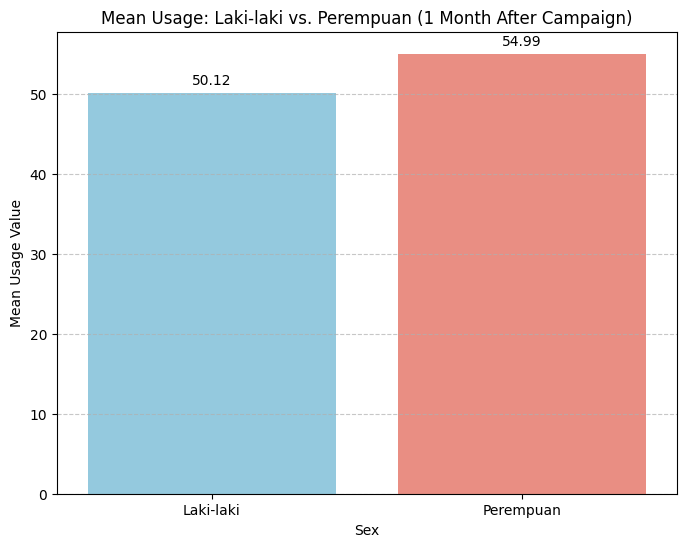

In [ ]:
# Filter data for male and female groups
male_usage = df_processed[df_processed['sex'] == 'Laki-laki']['Post_usage_1month']
female_usage = df_processed[df_processed['sex'] == 'Perempuan']['Post_usage_1month']

# Calculate means for visualization
mean_male_usage = male_usage.mean()
mean_female_usage = female_usage.mean()

# Prepare data for bar chart
mean_usage_data_sex = pd.DataFrame({
    'Sex': ['Laki-laki', 'Perempuan'],
    'Mean_Usage': [mean_male_usage, mean_female_usage]
})

# Create bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='Mean_Usage', hue='Sex', data=mean_usage_data_sex, palette={'Laki-laki': 'skyblue', 'Perempuan': 'salmon'}, legend=False)
plt.title('Mean Usage: Laki-laki vs. Perempuan (1 Month After Campaign)')
plt.ylabel('Mean Usage Value')
plt.xlabel('Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [ ]:
# Melakukan t-test "sebelum kampanye" vs "1 bulan setelah kampanye" untuk kategori Laki-laki dan Perempuan
statistic, p_value = stats.ttest_ind(male_usage, female_usage)

print(f"T-statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05

# Cek hasil uji hipotesis
print("\n\nInterpretasi hasil perbandingan H0 dan H1")
print("=========================================")
cek_hasil_uji_ind(p_value, alpha, male_usage.mean(), female_usage.mean(), 'Laki-laki', 'Perempuan', '1 bulan setelah kampanye')

T-statistic: -3.73
P-value: 0.000


Interpretasi hasil perbandingan H0 dan H1

Berdasarkan nilai p (kurang dari 0.05), hipotesis nol DITOLAK.

Ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit 1 bulan setelah kampanye antara kelompok Laki-laki dan Perempuan.
Rata-rata penggunaan kartu kredit 1 bulan setelah kampanye untuk kelompok Perempuan (54.99) secara signifikan lebih tinggi daripada kelompok Laki-laki (50.12).


# Kesimpulan: Tolak H0
Karena ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit 1 bulan setelah kampanye antara kelompok Laki-laki dan Perempuan.

## 3.2 Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye

# H0 (Hipotesis Nol):
Tidak ada perbedaan signifikan dalam rata-rata penggunaan kartu kredit 2 bulan setelah kampanye antara kelompok laki-laki dan perempuan. (Rata-rata penggunaan laki-laki = Rata-rata penggunaan perempuan)


---


# H1 (Hipotesis Alternatif):
Ada perbedaan signifikan dalam rata-rata penggunaan kartu kredit 2 bulan setelah kampanye antara kelompok laki-laki dan perempuan. (Rata-rata penggunaan laki-laki ≠ Rata-rata penggunaan perempuan)

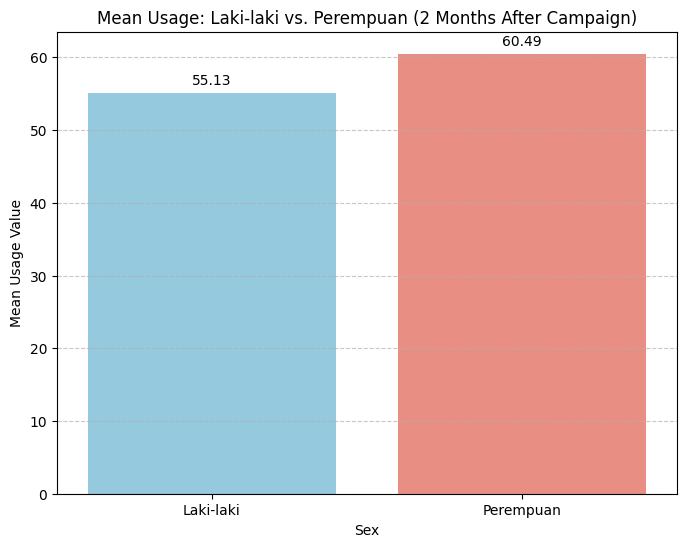

In [ ]:
# Filter data for male and female groups for post_usage_2ndmonth
male_usage_2nd_month = df_processed[df_processed['sex'] == 'Laki-laki']['post_usage_2ndmonth']
female_usage_2nd_month = df_processed[df_processed['sex'] == 'Perempuan']['post_usage_2ndmonth']

# Calculate means for visualization
mean_male_usage_2nd_month = male_usage_2nd_month.mean()
mean_female_usage_2nd_month = female_usage_2nd_month.mean()

# Prepare data for bar chart
mean_usage_data_sex_2nd_month = pd.DataFrame({
    'Sex': ['Laki-laki', 'Perempuan'],
    'Mean_Usage': [mean_male_usage_2nd_month, mean_female_usage_2nd_month]
})

# Create bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='Mean_Usage', hue='Sex', data=mean_usage_data_sex_2nd_month, palette={'Laki-laki': 'skyblue', 'Perempuan': 'salmon'}, legend=False)
plt.title('Mean Usage: Laki-laki vs. Perempuan (2 Months After Campaign)')
plt.ylabel('Mean Usage Value')
plt.xlabel('Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [ ]:
# Melakukan t-test "sebelum kampanye" vs "2 bulan setelah kampanye" untuk kategori Laki-laki dan Perempuan
statistic, p_value = stats.ttest_ind(male_usage_2nd_month, female_usage_2nd_month)

print(f"T-statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05

# Cek hasil uji hipotesis
print("\n\nInterpretasi hasil perbandingan H0 dan H1")
print("=========================================")
cek_hasil_uji_ind(p_value, alpha, male_usage_2nd_month.mean(), female_usage_2nd_month.mean(), 'Laki-laki', 'Perempuan', '2 bulan setelah kampanye')

T-statistic: -3.73
P-value: 0.000


Interpretasi hasil perbandingan H0 dan H1

Berdasarkan nilai p (kurang dari 0.05), hipotesis nol DITOLAK.

Ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit 2 bulan setelah kampanye antara kelompok Laki-laki dan Perempuan.
Rata-rata penggunaan kartu kredit 2 bulan setelah kampanye untuk kelompok Perempuan (60.49) secara signifikan lebih tinggi daripada kelompok Laki-laki (55.13).


# Kesimpulan: Tolak H0
karena ada perbedaan yang signifikan secara statistik dalam penggunaan kartu kredit 2 bulan setelah kampanye antara kelompok Laki-laki dan Perempuan.